<center><h1>Titanic Data Science Framework</h1></center>
<hr>

# thanks to...

**Kaggle Kernel**
> [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy?scriptVersionId=2051374)

# table of contents <a id="top"></a>
1. [Define the Problem](#1)
2. [Gather the Data](#2)
3. [Prepare Data for Consumption](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
    3. [Data Cleaning](#3.3)
        1. [Correcting](#3.3.1)
        2. [Creating](#3.3.2)
        3. [Completing](#3.3.3)
        4. [Converting](#3.3.4)
            1. [Binning](#3.3.4.1)
            2. [Categorical Value Coding](#3.3.4.2)
            3. [Dummy Value Coding](#3.3.4.3)
4. [Perform Exploratory Analysis with Statistics](#4)
5. [Model Data](#5)
    1. [Extract Features and Labels for Modeling](#5.1)
    2. [Machine Learning Modeling](#5.2)
    3. [Hyper Parameter Tuning](#5.3)
    4. [Feature Tuning](#5.4)
6. [Validate and Implement](#6)
    1. [Ensemble](#6.1)

<hr>

# 1. Define the Problem <a id="1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**The Challenge** - from Kaggle](https://www.kaggle.com/c/titanic/overview)<br> 
> The sinking of the Titanic is one of the most infamous shipwrecks in history.
> 
> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>  
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
>
> In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# 2. Gather the Data <a id="2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Overview** - from Kaggle](https://www.kaggle.com/c/titanic/data)
> The data has been split into two groups:
> 
> * training set (train.csv)
> * test set (test.csv)
> 
> The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
> 
> The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
> 
> We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

<table>
    <thead>
        <tr>
            <th>Variable</th>
            <th>Definition</th>
            <th>Key</th>
            <th>Other</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>survival</td>
            <td>Survival</td>
            <td>0 = No<br>1 = Yes</td>
            <td></td>
        </tr>
        <tr>
            <td>pclass</td>
            <td>Ticket class</td>
            <td>1 = 1st<br>2 = 2nd<br>3 = 3rd</td>
            <td></td>
        </tr>
        <tr>
            <td>sex</td>
            <td>Sex	</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Age in years</td>
            <td></td>
            <td>Age is fractional if less than 1.</td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td># of siblings / spouses aboard the Titanic</td>
            <td></td>
            <td>
                Sibling = brother, sister, stepbrother, stepsister<br>
                Spouse = husband, wife (mistresses and fiancés were ignored)
            </td>
        </tr>
        <tr>
            <td>parch</td>
            <td># of parents / children aboard the Titanic</td>
            <td></td>
            <td>
                Parent = mother, father<br>
                Child = daughter, son, stepdaughter, stepson
            </td>
        </tr>
        <tr>
            <td>ticket</td>
            <td>Ticket number</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>fare</td>
            <td>Passenger fare</td>
            <td></td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>Cabin number</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>embarked</td>
            <td>Port of Embarkation</td>
            <td>C = Cherbourg<br>Q = Queenstown<br>S = Southampton</td>
            <td></td>
        </tr>
    </tbody>
</table>

# 3. Prepare Data for Consumption <a id="3"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 3.1. Import Library <a id="3.1"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [117]:
### System-Related Library
import os
import time

### Python Standard Library 
import itertools

### String Regular Expressions
import re

### Numerical Value Library
import numpy as np

### Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe Library
import pandas as pd

### Machine Learning Library
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import RFECV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import neighbors

In [2]:
### Pandas Settings
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.mode.chained_assignment = None

In [3]:
### Maplotlib Settings
%matplotlib inline

## 3.2. Load Dataset <a id="3.2"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

Load Dataset(train.csv, test.csv) and then see global traits.

In [4]:
train_raw = pd.read_csv('./data/train.csv', encoding='utf-8')
train_raw

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
test_raw = pd.read_csv('./data/test.csv', encoding='utf-8')
test_raw

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

<br>**Basic Information about Dataset**

In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<br>**Null Value Detection**<br><br>
Train Data has missing values in Age, Cabin, Embarked<br>
Test Data has missing values in Age, Faer, Cabin

In [8]:
train_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_raw.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<br>**Data Distribution**

In [10]:
train_raw.describe(include='all')

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                      Name   Sex         Age       SibSp  \
count                                  891   891  714.000000  891.000000   
unique                                 891     2         NaN         NaN   
top     Harmer, Mr. Abraham (David Lishin)  male         NaN         NaN   
freq                                     1   577         NaN         NaN   
mean                                   NaN   NaN   29.699118    0.523008   
std                                    NaN   NaN   14.526497    1.102743   
min                                    NaN   NaN    0.420000    0.000000   
25%                                    NaN   NaN   20.125000    0.000000   
50%                                    NaN   NaN   28.000000    0.000000   
75%                                    NaN   NaN   38.000000    1.000000   
max                                    NaN   NaN   80.000000    8.000000   

             Parch    Ticket        Fare        Cabin Embarked  
count   891.000000       891  891.000000          204      889  
unique         NaN       681         NaN          147        3  
top            NaN  CA. 2343         NaN  C23 C25 C27        S  
freq           NaN         7         NaN            4      644  
mean      0.381594       NaN   32.204208          NaN      NaN  
std       0.806057       NaN   49.693429          NaN      NaN  
min       0.000000       NaN    0.000000          NaN      NaN  
25%       0.000000       NaN    7.910400          NaN      NaN  
50%       0.000000       NaN   14.454200          NaN      NaN  
75%       0.000000       NaN   31.000000          NaN      NaN  
max       6.000000       NaN  512.329200          NaN      NaN

In [11]:
test_raw.describe(include='all')

PassengerId      Pclass                         Name   Sex  \
count    418.000000  418.000000                          418   418   
unique          NaN         NaN                          418     2   
top             NaN         NaN  Rosblom, Miss. Salli Helena  male   
freq            NaN         NaN                            1   266   
mean    1100.500000    2.265550                          NaN   NaN   
std      120.810458    0.841838                          NaN   NaN   
min      892.000000    1.000000                          NaN   NaN   
25%      996.250000    1.000000                          NaN   NaN   
50%     1100.500000    3.000000                          NaN   NaN   
75%     1204.750000    3.000000                          NaN   NaN   
max     1309.000000    3.000000                          NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique         NaN         NaN         NaN       363         NaN   
top            NaN         NaN         NaN  PC 17608         NaN   
freq           NaN         NaN         NaN         5         NaN   
mean     30.272590    0.447368    0.392344       NaN   35.627188   
std      14.181209    0.896760    0.981429       NaN   55.907576   
min       0.170000    0.000000    0.000000       NaN    0.000000   
25%      21.000000    0.000000    0.000000       NaN    7.895800   
50%      27.000000    0.000000    0.000000       NaN   14.454200   
75%      39.000000    1.000000    0.000000       NaN   31.500000   
max      76.000000    8.000000    9.000000       NaN  512.329200   

                  Cabin Embarked  
count                91      418  
unique               76        3  
top     B57 B59 B63 B66        S  
freq                  3      270  
mean                NaN      NaN  
std                 NaN      NaN  
min                 NaN      NaN  
25%                 NaN      NaN  
50%                 NaN      NaN  
75%                 NaN      NaN  
max                 NaN      NaN

## 3.3. Data Cleaning <a id="3.3"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

<br>**Prepare Dataset**<br><br>
Concate train and test dataset. 

In [12]:
def get_dataset_by_ids(dataset, ids):
    return dataset[dataset['PassengerId'].isin(ids)]

In [13]:
train_ids = train_raw['PassengerId'].tolist()
test_ids = test_raw['PassengerId'].tolist()

In [14]:
dataset_cleaned = pd.concat([train_raw, test_raw], ignore_index=True)
dataset_cleaned['Survived'] = dataset_cleaned['Survived'].astype('Int64') # Int64 is Nullable Integer
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

### 3.3.1. Correcting <a id="3.3.1"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

There are no outlier values based on the results of describe() method

### 3.3.2. Creating <a id="3.3.2"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

<br>**1) Create Column using Name(Title)**

In [15]:
def create_title(dataset):
    dataset['Title'] = dataset['Name'].str.extract(r', ([a-zA-Z]+).')

In [16]:
create_title(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   Title  
0         0           A/5 21171    7.2500   NaN        S      Mr  
1         0            PC 17599   71.2833   C85        C     Mrs  
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss  
3         0              113803   53.1000  C123        S     Mrs  
4         0              373450    8.0500   NaN        S      Mr  
...     ...                 ...       ...   ...      ...     ...  
1304      0           A.5. 3236    8.0500   NaN        S      Mr  
1305      0            PC 17758  108.9000  C105        C    Dona  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr  
1307      0              359309    8.0500   NaN        S      Mr  
1308      1                2668   22.3583   NaN        C  Master  

[1309 rows x 13 columns]

In [17]:
dataset_cleaned['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Capt          1
Dona          1
Lady          1
Don           1
Jonkheer      1
the           1
Mme           1
Sir           1
Name: Title, dtype: int64

In [18]:
def clean_title(dataset):
    ### Title Ms -> Miss
    dataset.loc[dataset['Title'] == 'Ms', 'Title'] = 'Miss'
    
    ### Unless Mr, Miss, Mrs, Master Title becomes Other
    dataset.loc[~dataset['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master']), 'Title'] = 'Other'

In [19]:
clean_title(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   Title  
0         0           A/5 21171    7.2500   NaN        S      Mr  
1         0            PC 17599   71.2833   C85        C     Mrs  
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss  
3         0              113803   53.1000  C123        S     Mrs  
4         0              373450    8.0500   NaN        S      Mr  
...     ...                 ...       ...   ...      ...     ...  
1304      0           A.5. 3236    8.0500   NaN        S      Mr  
1305      0            PC 17758  108.9000  C105        C   Other  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr  
1307      0              359309    8.0500   NaN        S      Mr  
1308      1                2668   22.3583   NaN        C  Master  

[1309 rows x 13 columns]

In [20]:
dataset_cleaned['Title'].value_counts()

Mr        757
Miss      262
Mrs       197
Master     61
Other      32
Name: Title, dtype: int64

<br>**2) Create Column using SibSp, Parch(FamilySize, IsAlone)**

In [21]:
def create_familysize(dataset):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [22]:
create_familysize(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  
0         0           A/5 21171    7.2500   NaN        S      Mr           2  
1         0            PC 17599   71.2833   C85        C     Mrs           2  
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1  
3         0              113803   53.1000  C123        S     Mrs           2  
4         0              373450    8.0500   NaN        S      Mr           1  
...     ...                 ...       ...   ...      ...     ...         ...  
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1  
1305      0            PC 17758  108.9000  C105        C   Other           1  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1  
1307      0              359309    8.0500   NaN        S      Mr           1  
1308      1                2668   22.3583   NaN        C  Master           3  

[1309 rows x 14 columns]

In [23]:
dataset_cleaned['FamilySize'].describe()

count    1309.000000
mean        1.883881
std         1.583639
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: FamilySize, dtype: float64

In [24]:
dataset_cleaned['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [25]:
def create_isalone(dataset):
    dataset['IsAlone'] = dataset['FamilySize'] == 1
    dataset['IsAlone'] = dataset['IsAlone'].astype('int64')

In [26]:
create_isalone(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone  
0           0  
1           0  
2           1  
3           0  
4           1  
...       ...  
1304        1  
1305        1  
1306        1  
1307        1  
1308        0  

[1309 rows x 15 columns]

<br>**3) Create Column using Cabin(CabinClass)**

In [27]:
def create_cabinclass(dataset):
    dataset['CabinClass'] = dataset['Cabin'].str.extract(r'([a-zA-Z]+)')

In [28]:
create_cabinclass(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass  
0           0        NaN  
1           0          C  
2           1        NaN  
3           0          C  
4           1        NaN  
...       ...        ...  
1304        1        NaN  
1305        1          C  
1306        1        NaN  
1307        1        NaN  
1308        0        NaN  

[1309 rows x 16 columns]

### 3.3.3. Completing <a id="3.3.3"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [29]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  IsAlone      1309 non-null   int64  
 15  CabinClass   295 non-null    object 
dtypes: Int64(1), float64(2), int64(6), object(7)
memory usage: 165.0+ KB


In [30]:
dataset_cleaned.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
FamilySize        0
IsAlone           0
CabinClass     1014
dtype: int64

<br>**1) Filling Column Age**

In [31]:
dataset_cleaned.groupby('Title')['Age'].describe()

count       mean        std    min   25%   50%   75%   max
Title                                                             
Master   53.0   5.482642   4.161554   0.33   2.0   4.0   9.0  14.5
Miss    211.0  21.803744  12.227392   0.17  15.0  22.0  30.0  63.0
Mr      581.0  32.252151  12.422089  11.00  23.0  29.0  39.0  80.0
Mrs     170.0  36.994118  12.901767  14.00  27.0  35.5  46.5  76.0
Other    31.0  43.129032  12.309189  23.00  32.5  45.0  52.5  70.0

In [32]:
def fill_age(dataset):
    pattern = r'Other$'
    idx = dataset['Title'].str.match(pattern)
    value = dataset['Age'].median()
    
    print('When Title is {:7} -> Fill Age with {}'.format('Other', value))
    
    dataset.loc[idx, 'Age'] = dataset.loc[idx, 'Age'].fillna(value)
    
    titles = ['Master', 'Miss', 'Mr', 'Mrs']
    for title in titles:
        pattern = r'' + title + '$'
        idx = dataset['Title'].str.match(pattern)
        value = dataset.groupby('Title')['Age'].median()[title]

        print('When Title is {:7} -> Fill Age with {}'.format(title, value))

        dataset.loc[idx, 'Age'] = dataset.loc[idx, 'Age'].fillna(value)

In [33]:
fill_age(dataset_cleaned)

When Title is Other   -> Fill Age with 28.0
When Title is Master  -> Fill Age with 4.0
When Title is Miss    -> Fill Age with 22.0
When Title is Mr      -> Fill Age with 29.0
When Title is Mrs     -> Fill Age with 35.5


In [34]:
dataset_cleaned.groupby('Title')['Age'].describe()

count       mean        std    min   25%   50%    75%   max
Title                                                              
Master   61.0   5.288197   3.906924   0.33   2.0   4.0   8.00  14.5
Miss    262.0  21.841947  10.968170   0.17  17.0  22.0  27.00  63.0
Mr      757.0  31.496037  10.966971  11.00  25.0  29.0  35.00  80.0
Mrs     197.0  36.789340  11.991282  14.00  28.0  35.5  45.00  76.0
Other    32.0  42.656250  12.400857  23.00  31.5  44.5  52.25  70.0

<br>**2) Filling Column Fare**

In [35]:
dataset_cleaned.groupby('Pclass')['Fare'].describe()

count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

In [36]:
def fill_fare(dataset):
    for pclass in dataset['Pclass'].unique():
        idx = dataset['Pclass'] == pclass
        value = dataset.groupby('Pclass')['Fare'].median()[pclass]

        print('When Pclass is {:} -> Fill Fare with {:}'.format(pclass, value))

        dataset.loc[idx, 'Fare'] = dataset.loc[idx, 'Fare'].fillna(value)

In [37]:
fill_fare(dataset_cleaned)

When Pclass is 3 -> Fill Fare with 8.05
When Pclass is 1 -> Fill Fare with 60.0
When Pclass is 2 -> Fill Fare with 15.0458


In [38]:
dataset_cleaned.groupby('Pclass')['Fare'].describe()

count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       709.0  13.295480  11.487932  0.0   7.7500   8.0500   15.2458   69.5500

<br>**3) Filling Column CabinClass**

In [39]:
dataset_cleaned.groupby('Pclass')['CabinClass'].describe()

count unique top freq
Pclass                      
1        256      6   C   94
2         23      3   F   13
3         16      3   F    8

In [40]:
def fill_cabinclass(dataset):
    for pclass in dataset['Pclass'].unique():
        idx = dataset['Pclass'] == pclass
        value = dataset_cleaned.groupby('Pclass')['CabinClass'].describe()['top'][pclass]

        print('When Pclass is {:} -> fill CabinClass with {:}'.format(pclass, value))

        dataset.loc[idx, 'CabinClass'] = dataset.loc[idx, 'CabinClass'].fillna(value)

In [41]:
fill_cabinclass(dataset_cleaned)

When Pclass is 3 -> fill CabinClass with F
When Pclass is 1 -> fill CabinClass with C
When Pclass is 2 -> fill CabinClass with F


In [42]:
dataset_cleaned.groupby('Pclass')['CabinClass'].describe()

count unique top freq
Pclass                      
1        323      6   C  161
2        277      3   F  267
3        709      3   F  701

In [43]:
dataset_cleaned['CabinClass'].value_counts()

F    968
C    161
B     65
D     46
E     41
A     22
G      5
T      1
Name: CabinClass, dtype: int64

<br>**4) Filling Column Embarked**

In [44]:
dataset_cleaned['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [45]:
def fill_embarked(dataset):
    value = dataset_cleaned['Embarked'].describe()['top']
    
    print('Fill Embarked with {:}'.format(value))
    
    dataset['Embarked'] = dataset['Embarked'].fillna(value)

In [46]:
fill_embarked(dataset_cleaned)

Fill Embarked with S


In [47]:
dataset_cleaned['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

<hr>

In [48]:
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass  
0           0          F  
1           0          C  
2           1          F  
3           0          C  
4           1          F  
...       ...        ...  
1304        1          F  
1305        1          C  
1306        1          F  
1307        1          F  
1308        0          F  

[1309 rows x 16 columns]

In [49]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  IsAlone      1309 non-null   int64  
 15  CabinClass   1309 non-null   object 
dtypes: Int64(1), float64(2), int64(6), object(7)
memory usage: 165.0+ KB


In [50]:
dataset_cleaned.describe(include='all')

PassengerId    Survived       Pclass                  Name   Sex  \
count   1309.000000  891.000000  1309.000000                  1309  1309   
unique          NaN         NaN          NaN                  1307     2   
top             NaN         NaN          NaN  Connolly, Miss. Kate  male   
freq            NaN         NaN          NaN                     2   843   
mean     655.000000    0.383838     2.294882                   NaN   NaN   
std      378.020061    0.486592     0.837836                   NaN   NaN   
min        1.000000    0.000000     1.000000                   NaN   NaN   
25%      328.000000    0.000000     2.000000                   NaN   NaN   
50%      655.000000    0.000000     3.000000                   NaN   NaN   
75%      982.000000    1.000000     3.000000                   NaN   NaN   
max     1309.000000    1.000000     3.000000                   NaN   NaN   

                Age        SibSp        Parch    Ticket         Fare  \
count   1309.000000  1309.000000  1309.000000      1309  1309.000000   
unique          NaN          NaN          NaN       929          NaN   
top             NaN          NaN          NaN  CA. 2343          NaN   
freq            NaN          NaN          NaN        11          NaN   
mean      29.411895     0.498854     0.385027       NaN    33.276193   
std       13.154233     1.041658     0.865560       NaN    51.743584   
min        0.170000     0.000000     0.000000       NaN     0.000000   
25%       22.000000     0.000000     0.000000       NaN     7.895800   
50%       29.000000     0.000000     0.000000       NaN    14.454200   
75%       35.500000     1.000000     0.000000       NaN    31.275000   
max       80.000000     8.000000     9.000000       NaN   512.329200   

              Cabin Embarked Title   FamilySize      IsAlone CabinClass  
count           295     1309  1309  1309.000000  1309.000000       1309  
unique          186        3     5          NaN          NaN          8  
top     C23 C25 C27        S    Mr          NaN          NaN          F  
freq              6      916   757          NaN          NaN        968  
mean            NaN      NaN   NaN     1.883881     0.603514        NaN  
std             NaN      NaN   NaN     1.583639     0.489354        NaN  
min             NaN      NaN   NaN     1.000000     0.000000        NaN  
25%             NaN      NaN   NaN     1.000000     0.000000        NaN  
50%             NaN      NaN   NaN     1.000000     1.000000        NaN  
75%             NaN      NaN   NaN     2.000000     1.000000        NaN  
max             NaN      NaN   NaN    11.000000     1.000000        NaN

In [51]:
dataset_cleaned.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
FamilySize        0
IsAlone           0
CabinClass        0
dtype: int64

### 3.3.4. Converting <a id="3.3.4"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

#### 3.3.4.1. Binning <a id="3.3.4.1"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

<br>**1) Column Age Binning**

In [52]:
def bin_age(dataset):
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype('int64'), 5)

In [53]:
bin_age(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin  
0           0          F   (16.0, 32.0]  
1           0          C   (32.0, 48.0]  
2           1          F   (16.0, 32.0]  
3           0          C   (32.0, 48.0]  
4           1          F   (32.0, 48.0]  
...       ...        ...            ...  
1304        1          F   (16.0, 32.0]  
1305        1          C   (32.0, 48.0]  
1306        1          F   (32.0, 48.0]  
1307        1          F   (16.0, 32.0]  
1308        0          F  (-0.08, 16.0]  

[1309 rows x 17 columns]

<br>**2) Column Fare Binning**

In [54]:
def bin_fare(dataset):
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 5)

In [55]:
bin_fare(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  
0           0          F   (16.0, 32.0]    (-0.001, 7.854]  
1           0          C   (32.0, 48.0]  (41.579, 512.329]  
2           1          F   (16.0, 32.0]      (7.854, 10.5]  
3           0          C   (32.0, 48.0]  (41.579, 512.329]  
4           1          F   (32.0, 48.0]      (7.854, 10.5]  
...       ...        ...            ...                ...  
1304        1          F   (16.0, 32.0]      (7.854, 10.5]  
1305        1          C   (32.0, 48.0]  (41.579, 512.329]  
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]  
1307        1          F   (16.0, 32.0]      (7.854, 10.5]  
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]  

[1309 rows x 18 columns]

In [56]:
dataset_cleaned['FareBin'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: FareBin, dtype: int64

#### 3.3.4.2. Categorical Value Coding <a id="3.3.4.2"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [57]:
def encode_sex(dataset):
    encoder = LabelEncoder()
    dataset['SexCode'] = encoder.fit_transform(dataset['Sex'])
    return encoder

In [58]:
encoder_sex = encode_sex(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1  
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0  
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0  
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0  
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1  
...       ...        ...            ...                ...      ...  
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1  
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0  
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1  
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1  
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1  

[1309 rows x 19 columns]

In [59]:
def encode_embarked(dataset):
    encoder = LabelEncoder()
    dataset['EmbarkedCode'] = encoder.fit_transform(dataset['Embarked'])
    return encoder

In [60]:
encoder_embarked = encode_embarked(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  \
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1   
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0   
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1   
...       ...        ...            ...                ...      ...   
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0   
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1   
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1   

      EmbarkedCode  
0                2  
1                0  
2                2  
3                2  
4                2  
...            ...  
1304             2  
1305             0  
1306             2  
1307             2  
1308             0  

[1309 rows x 20 columns]

In [61]:
def encode_title(dataset):
    encoder = LabelEncoder()
    dataset['TitleCode'] = encoder.fit_transform(dataset['Title'])
    return encoder

In [62]:
encoder_title = encode_title(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  \
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1   
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0   
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1   
...       ...        ...            ...                ...      ...   
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0   
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1   
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1   

      EmbarkedCode  TitleCode  
0                2          2  
1                0          3  
2                2          1  
3                2          3  
4                2          2  
...            ...        ...  
1304             2          2  
1305             0          4  
1306             2          2  
1307             2          2  
1308             0          0  

[1309 rows x 21 columns]

In [63]:
def encode_cabinclass(dataset):
    encoder = LabelEncoder()
    dataset['CabinClassCode'] = encoder.fit_transform(dataset['CabinClass'])
    return encoder

In [64]:
encoder_cabinclass = encode_cabinclass(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  \
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1   
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0   
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1   
...       ...        ...            ...                ...      ...   
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0   
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1   
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1   

      EmbarkedCode  TitleCode  CabinClassCode  
0                2          2               5  
1                0          3               2  
2                2          1               5  
3                2          3               2  
4                2          2               5  
...            ...        ...             ...  
1304             2          2               5  
1305             0          4               2  
1306             2          2               5  
1307             2          2               5  
1308             0          0               5  

[1309 rows x 22 columns]

In [65]:
def encode_agebin(dataset):
    encoder = LabelEncoder()
    dataset['AgeBinCode'] = encoder.fit_transform(dataset['AgeBin'])
    return encoder

In [66]:
encoder_agebin = encode_agebin(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  \
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1   
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0   
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1   
...       ...        ...            ...                ...      ...   
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0   
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1   
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1   

      EmbarkedCode  TitleCode  CabinClassCode  AgeBinCode  
0                2          2               5           1  
1                0          3               2           2  
2                2          1               5           1  
3                2          3               2           2  
4                2          2               5           2  
...            ...        ...             ...         ...  
1304             2          2               5           1  
1305             0          4               2           2  
1306             2          2               5           2  
1307             2          2               5           1  
1308             0          0               5           0  

[1309 rows x 23 columns]

In [67]:
def encode_farebin(dataset):
    encoder = LabelEncoder()
    dataset['FareBinCode'] = encoder.fit_transform(dataset['FareBin'])
    return encoder

In [68]:
encoder_farebin = encode_farebin(dataset_cleaned)
dataset_cleaned

PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305      <NA>       3   
1305         1306      <NA>       1   
1306         1307      <NA>       3   
1307         1308      <NA>       3   
1308         1309      <NA>       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Cabin Embarked   Title  FamilySize  \
0         0           A/5 21171    7.2500   NaN        S      Mr           2   
1         0            PC 17599   71.2833   C85        C     Mrs           2   
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss           1   
3         0              113803   53.1000  C123        S     Mrs           2   
4         0              373450    8.0500   NaN        S      Mr           1   
...     ...                 ...       ...   ...      ...     ...         ...   
1304      0           A.5. 3236    8.0500   NaN        S      Mr           1   
1305      0            PC 17758  108.9000  C105        C   Other           1   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr           1   
1307      0              359309    8.0500   NaN        S      Mr           1   
1308      1                2668   22.3583   NaN        C  Master           3   

      IsAlone CabinClass         AgeBin            FareBin  SexCode  \
0           0          F   (16.0, 32.0]    (-0.001, 7.854]        1   
1           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
2           1          F   (16.0, 32.0]      (7.854, 10.5]        0   
3           0          C   (32.0, 48.0]  (41.579, 512.329]        0   
4           1          F   (32.0, 48.0]      (7.854, 10.5]        1   
...       ...        ...            ...                ...      ...   
1304        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1305        1          C   (32.0, 48.0]  (41.579, 512.329]        0   
1306        1          F   (32.0, 48.0]    (-0.001, 7.854]        1   
1307        1          F   (16.0, 32.0]      (7.854, 10.5]        1   
1308        0          F  (-0.08, 16.0]   (21.558, 41.579]        1   

      EmbarkedCode  TitleCode  CabinClassCode  AgeBinCode  FareBinCode  
0                2          2               5           1            0  
1                0          3               2           2            4  
2                2          1               5           1            1  
3                2          3               2           2            4  
4                2          2               5           2            1  
...            ...        ...             ...         ...          ...  
1304             2          2               5           1            1  
1305             0          4               2           2            4  
1306             2          2               5           2            0  
1307             2          2   

#### 3.3.4.3. Dummy Value Coding <a id="3.3.4.3"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [69]:
def to_dummy_value(dataset, columns):
    return pd.get_dummies(dataset, columns=columns)

In [70]:
columns = ['Pclass', 'SexCode', 'AgeBinCode', 'FareBinCode', 'EmbarkedCode', 'TitleCode', 'CabinClassCode']
dataset_dummy = to_dummy_value(dataset_cleaned.loc[:, columns], columns)
dataset_cleaned = pd.concat([dataset_cleaned, dataset_dummy], axis=1, join='inner')

<hr>

<br>**Reformat Dataset**<br><br>
Split train and test dataset. 

In [71]:
def get_dataset_by_ids(dataset, ids):
    return dataset[dataset['PassengerId'].isin(ids)]

In [72]:
train_cleaned = get_dataset_by_ids(dataset_cleaned, train_ids)
test_cleaned = get_dataset_by_ids(dataset_cleaned, test_ids)

In [73]:
train_cleaned

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  22.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  \
0        0         A/5 21171   7.2500   NaN        S     Mr           2   
1        0          PC 17599  71.2833   C85        C    Mrs           2   
2        0  STON/O2. 3101282   7.9250   NaN        S   Miss           1   
3        0            113803  53.1000  C123        S    Mrs           2   
4        0            373450   8.0500   NaN        S     Mr           1   
..     ...               ...      ...   ...      ...    ...         ...   
886      0            211536  13.0000   NaN        S  Other           1   
887      0            112053  30.0000   B42        S   Miss           1   
888      2        W./C. 6607  23.4500   NaN        S   Miss           4   
889      0            111369  30.0000  C148        C     Mr           1   
890      0            370376   7.7500   NaN        Q     Mr           1   

     IsAlone CabinClass        AgeBin            FareBin  SexCode  \
0          0          F  (16.0, 32.0]    (-0.001, 7.854]        1   
1          0          C  (32.0, 48.0]  (41.579, 512.329]        0   
2          1          F  (16.0, 32.0]      (7.854, 10.5]        0   
3          0          C  (32.0, 48.0]  (41.579, 512.329]        0   
4          1          F  (32.0, 48.0]      (7.854, 10.5]        1   
..       ...        ...           ...                ...      ...   
886        1          F  (16.0, 32.0]     (10.5, 21.558]        1   
887        1          B  (16.0, 32.0]   (21.558, 41.579]        0   
888        0          F  (16.0, 32.0]   (21.558, 41.579]        0   
889        1          C  (16.0, 32.0]   (21.558, 41.579]        1   
890        1          F  (16.0, 32.0]    (-0.001, 7.854]        1   

     EmbarkedCode  TitleCode  CabinClassCode  AgeBinCode  FareBinCode  \
0               2          2               5           1            0   
1               0          3               2           2            4   
2               2          1               5           1            1   
3               2          3               2           2            4   
4               2          2               5           2            1   
..            ...        ...             ...         ...          ...   
886             2          4               5           1            2   
887             2          1               1           1            3   
888             2          1               5           1            3   
889             0          2               2           1            3   
890             1          2               5           1          

In [74]:
test_cleaned

PassengerId  Survived  Pclass  \
891           892      <NA>       3   
892           893      <NA>       3   
893           894      <NA>       2   
894           895      <NA>       3   
895           896      <NA>       3   
896           897      <NA>       3   
897           898      <NA>       3   
898           899      <NA>       2   
899           900      <NA>       3   
900           901      <NA>       3   
901           902      <NA>       3   
902           903      <NA>       1   
903           904      <NA>       1   
904           905      <NA>       2   
905           906      <NA>       1   
906           907      <NA>       2   
907           908      <NA>       2   
908           909      <NA>       3   
909           910      <NA>       3   
910           911      <NA>       3   
911           912      <NA>       1   
912           913      <NA>       3   
913           914      <NA>       1   
914           915      <NA>       1   
915           916      <NA>       1   
916           917      <NA>       3   
917           918      <NA>       1   
918           919      <NA>       3   
919           920      <NA>       1   
920           921      <NA>       3   
921           922      <NA>       2   
922           923      <NA>       2   
923           924      <NA>       3   
924           925      <NA>       3   
925           926      <NA>       1   
926           927      <NA>       3   
927           928      <NA>       3   
928           929      <NA>       3   
929           930      <NA>       3   
930           931      <NA>       3   
931           932      <NA>       3   
932           933      <NA>       1   
933           934      <NA>       3   
934           935      <NA>       2   
935           936      <NA>       1   
936           937      <NA>       3   
937           938      <NA>       1   
938           939      <NA>       3   
939           940      <NA>       1   
940           941      <NA>       3   
941           942      <NA>       1   
942           943      <NA>       2   
943           944      <NA>       2   
944           945      <NA>       1   
945           946      <NA>       2   
946           947      <NA>       3   
947           948      <NA>       3   
948           949      <NA>       3   
949           950      <NA>       3   
950           951      <NA>       1   
951           952      <NA>       3   
952           953      <NA>       2   
953           954      <NA>       3   
954           955      <NA>       3   
955           956      <NA>       1   
956           957      <NA>       2   
957           958      <NA>       3   
958           959      <NA>       1   
959           960      <NA>       1   
960           961      <NA>       1   
961           962      <NA>       3   
962           963      <NA>       3   
963           964      <NA>       3   
964           965      <NA>       1   
965           966      <NA>       1   
966           967      <NA>       1   
967           968      <NA>       3   
968           969      <NA>       1   
969           970      <NA>       2   
970           971      <NA>       3   
971           972      <NA>       3   
972           973      <NA>       1   
973           974      <NA>       1   
974           975      <NA>       3   
975           976      <NA>       2   
976           977      <NA>       3   
977           978      <NA>       3   
978           979      <NA>       3   
979           980      <NA>       3   
980           981      <NA>       2   
981           982      <NA>       3   
982           983      <NA>       3   
983           984      <NA>       1   
984           985      <NA>       3   
985           986      <NA>       1   
986           987      <NA>       3   
987           988      <NA>       1   
988           989      <NA>       3   
989           990      <NA>       3   
990           991      <NA>       3   
991           992      <NA>       1   
992           993      <NA> 

In [75]:
test_cleaned = test_cleaned.drop('Survived', axis=1)
test_cleaned

PassengerId  Pclass                                               Name  \
891           892       3                                   Kelly, Mr. James   
892           893       3                   Wilkes, Mrs. James (Ellen Needs)   
893           894       2                          Myles, Mr. Thomas Francis   
894           895       3                                   Wirz, Mr. Albert   
895           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
896           897       3                         Svensson, Mr. Johan Cervin   
897           898       3                               Connolly, Miss. Kate   
898           899       2                       Caldwell, Mr. Albert Francis   
899           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
900           901       3                            Davies, Mr. John Samuel   
901           902       3                                   Ilieff, Mr. Ylio   
902           903       1                         Jones, Mr. Charles Cresson   
903           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
904           905       2                               Howard, Mr. Benjamin   
905           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
906           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
907           908       2                                  Keane, Mr. Daniel   
908           909       3                                  Assaf, Mr. Gerios   
909           910       3                       Ilmakangas, Miss. Ida Livija   
910           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
911           912       1                             Rothschild, Mr. Martin   
912           913       3                          Olsen, Master. Artur Karl   
913           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
914           915       1                    Williams, Mr. Richard Norris II   
915           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
916           917       3                            Robins, Mr. Alexander A   
917           918       1                       Ostby, Miss. Helene Ragnhild   
918           919       3                                  Daher, Mr. Shedid   
919           920       1                            Brady, Mr. John Bertram   
920           921       3                                  Samaan, Mr. Elias   
921           922       2                       Louch, Mr. Charles Alexander   
922           923       2                      Jefferys, Mr. Clifford Thomas   
923           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
924           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
925           926       1                           Mock, Mr. Philipp Edmund   
926           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
927           928       3                                Roth, Miss. Sarah A   
928           929       3                                 Cacic, Miss. Manda   
929           930       3                                    Sap, Mr. Julius   
930           931       3                                      Hee, Mr. Ling   
931           932       3                                   Karun, Mr. Franz   
932           933       1                        Franklin, Mr. Thomas Parham   
933           934       3                              Goldsmith, Mr. Nathan   
934           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
935           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
936           937       3                    Peltomaki, Mr. Nikolai Johannes   
937           938       1                           Chevre, Mr. Paul Romaine   
938           939       3                           Shaughnessy, Mr. Patrick   
939           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
940   

# 4. Perform Exploratory Analysis with Statistics <a id="4"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [76]:
columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'CabinClass', 'AgeBin', 'FareBin']
for column in columns:
    print('Survival Correlation by: {}'.format(column))
    print(train_cleaned.groupby(column)['Survived'].mean())
    print('-' * 10)
    print()

Survival Correlation by: Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
----------

Survival Correlation by: Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
----------

Survival Correlation by: Embarked
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
----------

Survival Correlation by: Title
Title
Master    0.575000
Miss      0.699454
Mr        0.156673
Mrs       0.792000
Other     0.423077
Name: Survived, dtype: float64
----------

Survival Correlation by: IsAlone
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
----------

Survival Correlation by: CabinClass
CabinClass
A    0.466667
B    0.744681
C    0.545455
D    0.757576
E    0.750000
F    0.295455
G    0.500000
T    0.000000
Name: Survived, dtype: float64
----------

Survival Correlation by: AgeBin
AgeBin
(-0.08, 16.0]    0.548077
(16.0, 32.0]     0.327381
(32.0, 48.0]     0.438424
(48.0, 64.0]     0.434783
(6

In [77]:
columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'CabinClass', 'AgeBin', 'FareBin']
for column in columns:
    print('Survival Correlation by: {}'.format(column))
    print(pd.crosstab(train_cleaned[column], train_cleaned['Survived']))
    print('-' * 10)
    print()

Survival Correlation by: Pclass
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
----------

Survival Correlation by: Sex
Survived    0    1
Sex               
female     81  233
male      468  109
----------

Survival Correlation by: Embarked
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
----------

Survival Correlation by: Title
Survived    0    1
Title             
Master     17   23
Miss       55  128
Mr        436   81
Mrs        26   99
Other      15   11
----------

Survival Correlation by: IsAlone
Survived    0    1
IsAlone           
0         175  179
1         374  163
----------

Survival Correlation by: CabinClass
Survived      0    1
CabinClass          
A             8    7
B            12   35
C            45   54
D             8   25
E             8   24
F           465  195
G             2    2
T             1    0
----------

Survival Correlation by: AgeBin
Survived        

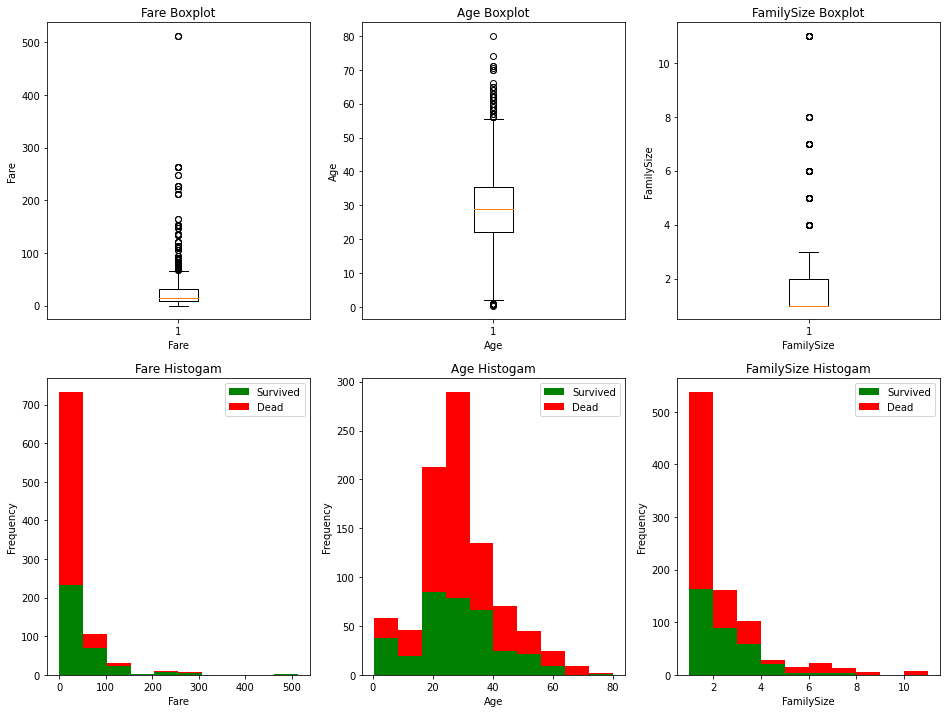

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

columns = ['Fare', 'Age', 'FamilySize']
for idx, column in enumerate(columns):
    axes[0, idx].boxplot(train_cleaned[column])
    axes[0, idx].set_title('{} Boxplot'.format(column))
    axes[0, idx].set_xlabel(column)
    axes[0, idx].set_ylabel(column)

    axes[1, idx].hist(
        x=[train_cleaned.loc[train_cleaned['Survived'] == 1, column], 
           train_cleaned.loc[train_cleaned['Survived'] == 0, column]],
        label=['Survived', 'Dead'],
        stacked=True,
        color=['g', 'r']
    )
    axes[1, idx].set_title('{} Histogam'.format(column))
    axes[1, idx].set_xlabel(column)
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].legend()
    

plt.show()

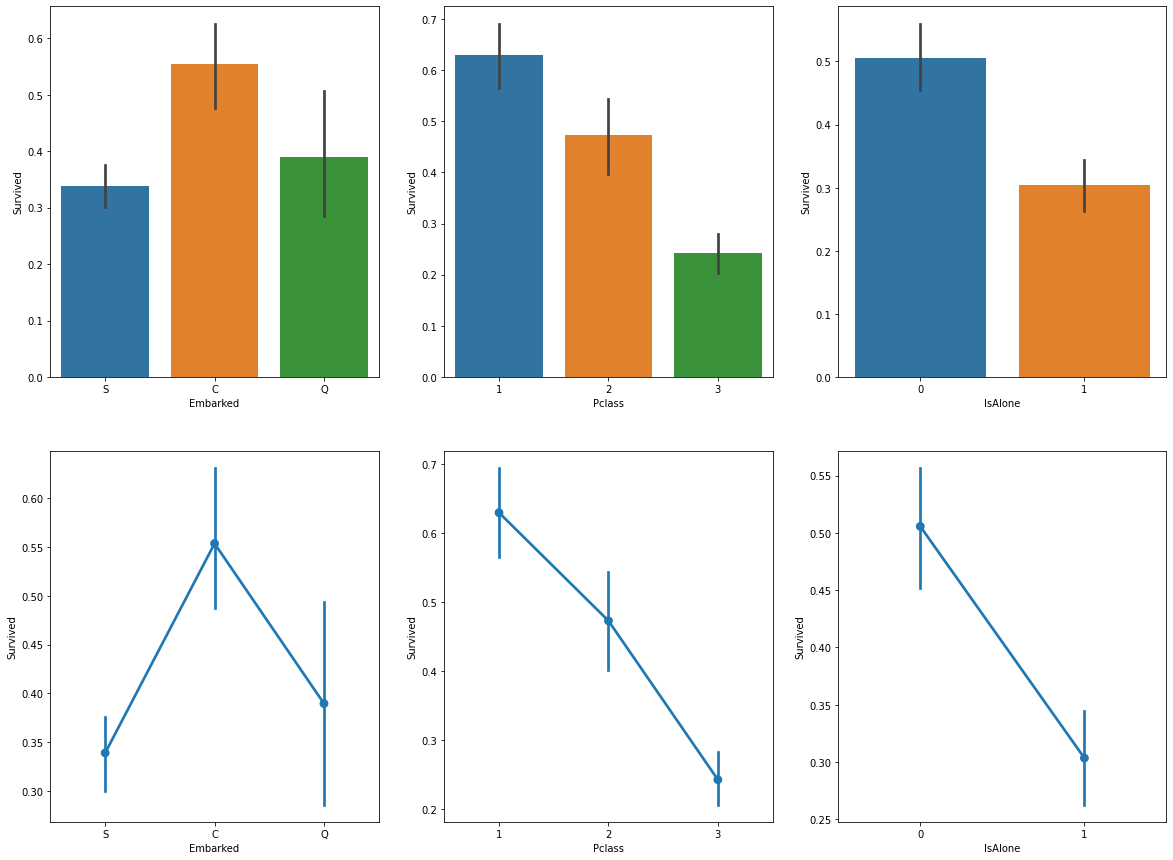

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
columns = ['Embarked', 'Pclass', 'IsAlone']

for idx, column in enumerate(columns):
    sns.barplot(x=column, y='Survived', data=train_cleaned, ax=axes[0, idx])
    sns.pointplot(x=column, y='Survived', data=train_cleaned, ax=axes[1, idx])

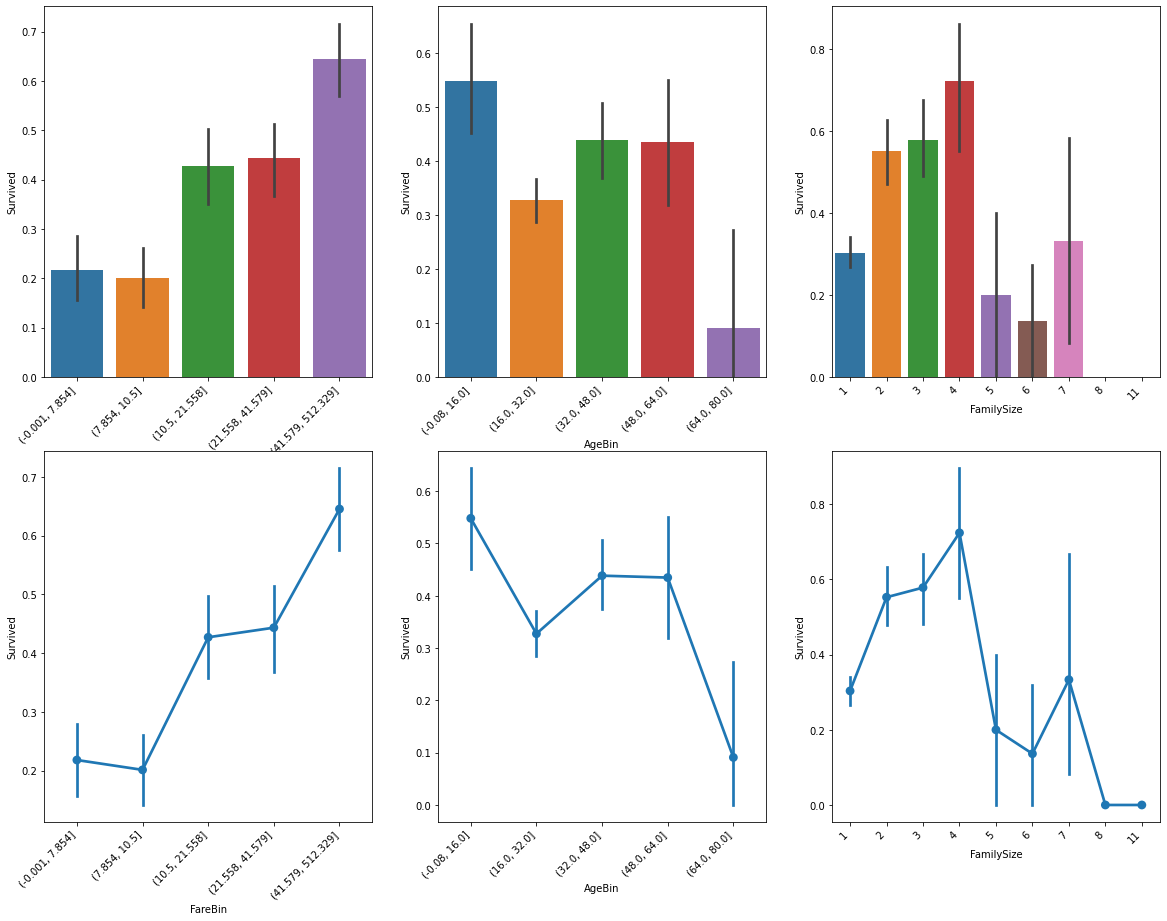

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
columns = ['FareBin', 'AgeBin', 'FamilySize']

for idx, column in enumerate(columns):
    barplot = sns.barplot(x=column, y='Survived', data=train_cleaned, ax=axes[0, idx])
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

    pointplot = sns.pointplot(x=column, y='Survived', data=train_cleaned, ax=axes[1, idx])
    pointplot.set_xticklabels(pointplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    

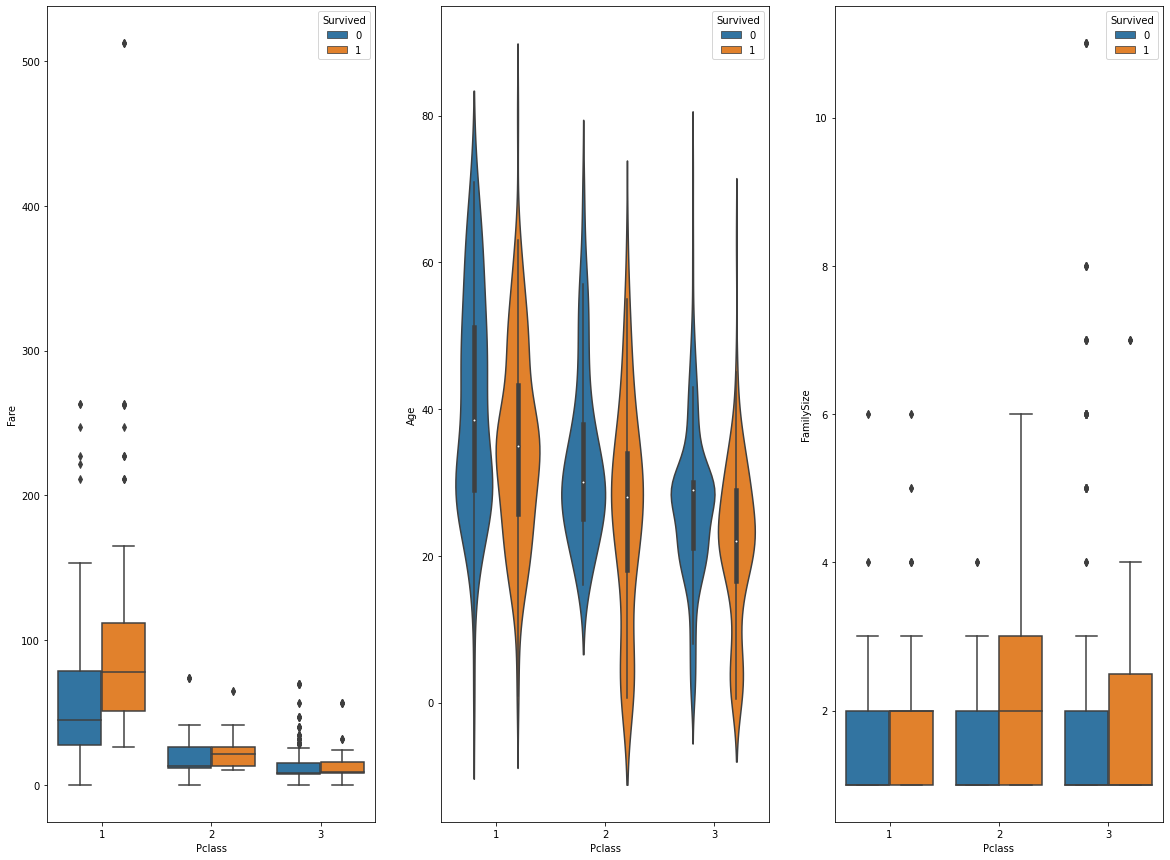

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))

columns = ['Fare', 'Age', 'FamilySize']

for idx, column in enumerate(columns):
    if column == 'Age':
        sns.violinplot(x='Pclass', y=column, hue='Survived', data=train_cleaned, ax=axes[idx])
    else:
        sns.boxplot(x='Pclass', y=column, hue='Survived', data=train_cleaned, ax=axes[idx])

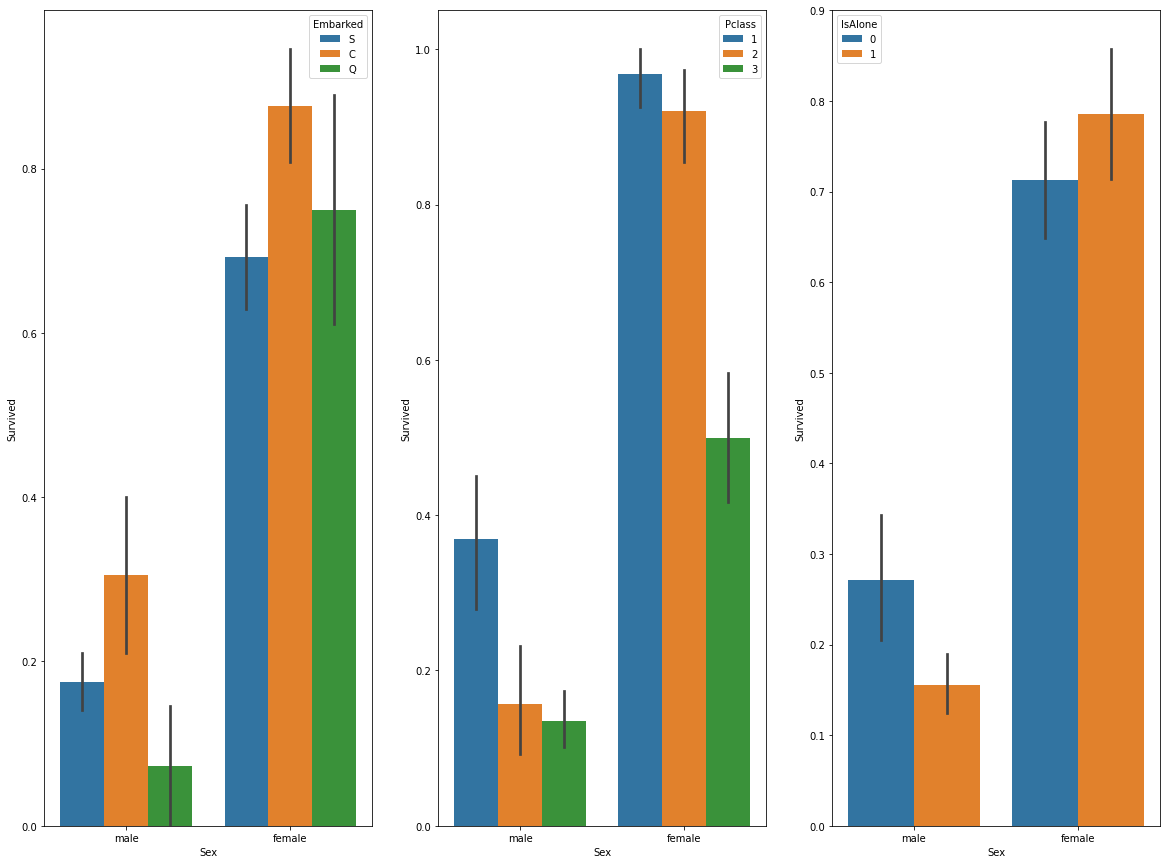

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))

columns = ['Embarked', 'Pclass', 'IsAlone']

for idx, column in enumerate(columns):
    sns.barplot(x='Sex', y='Survived', hue=column, data=train_cleaned, ax=axes[idx])

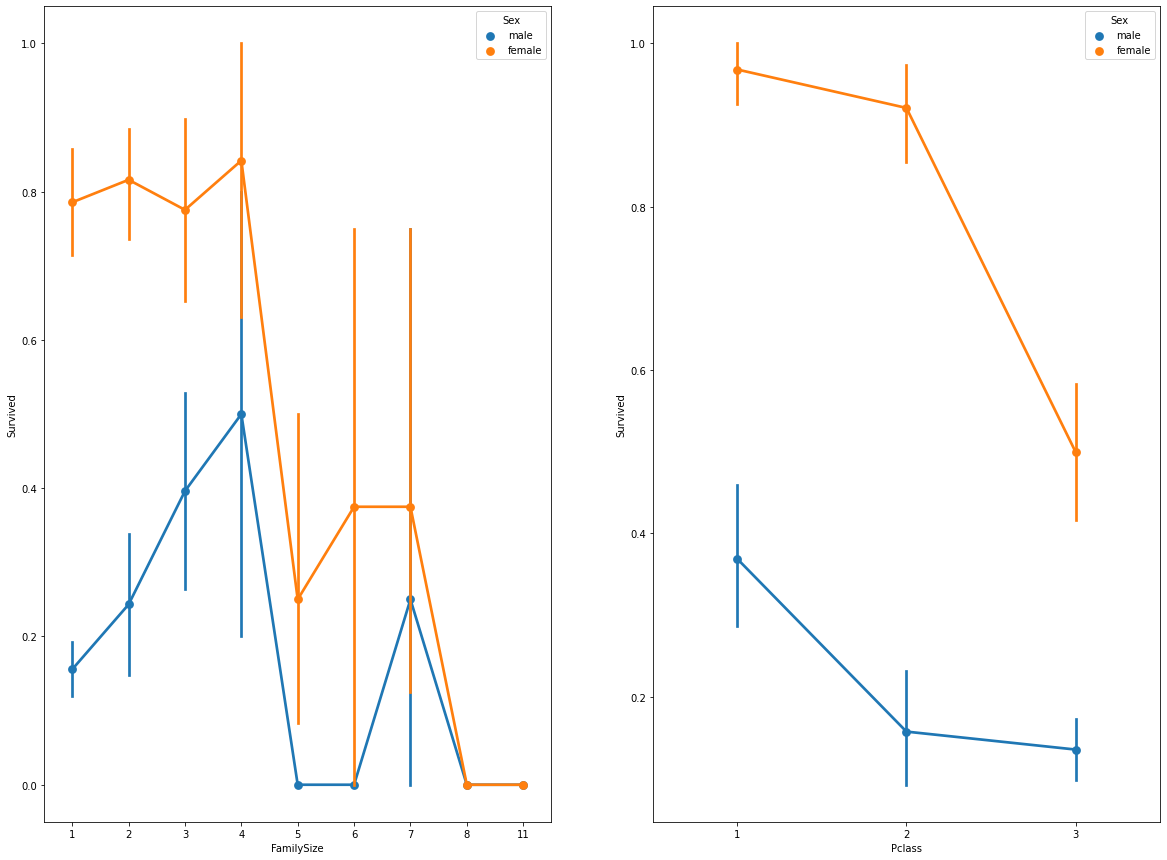

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

columns = ['FamilySize', 'Pclass']

for idx, column in enumerate(columns):
    sns.pointplot(x=column, y='Survived', hue='Sex', data=train_cleaned, ax=axes[idx])

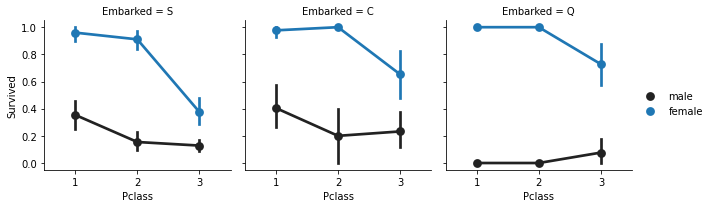

In [84]:
facet = sns.FacetGrid(data=train_cleaned, col='Embarked')
facet.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1, 2, 3], hue_order=['male', 'female'])
facet.add_legend()

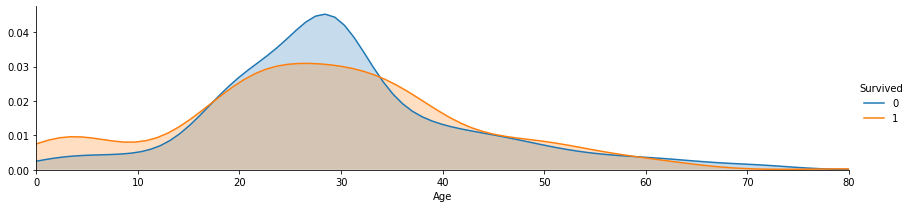

In [85]:
facet = sns.FacetGrid(data=train_cleaned, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_cleaned['Age'].max()))
facet.add_legend()

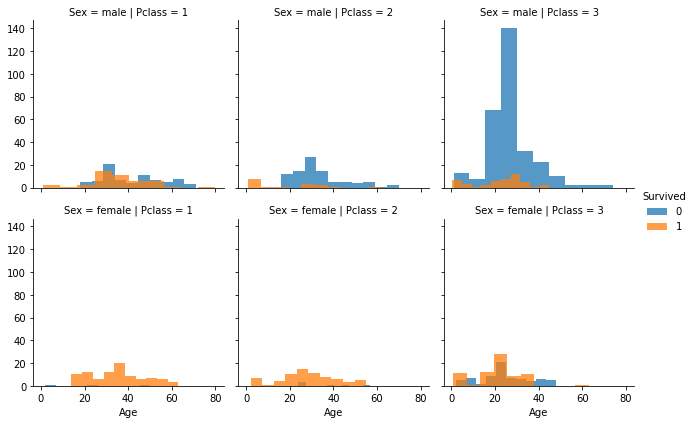

In [86]:
facet = sns.FacetGrid(data=train_cleaned, hue='Survived', row='Sex', col='Pclass')
facet.map(plt.hist, 'Age', alpha=.75)
facet.add_legend()

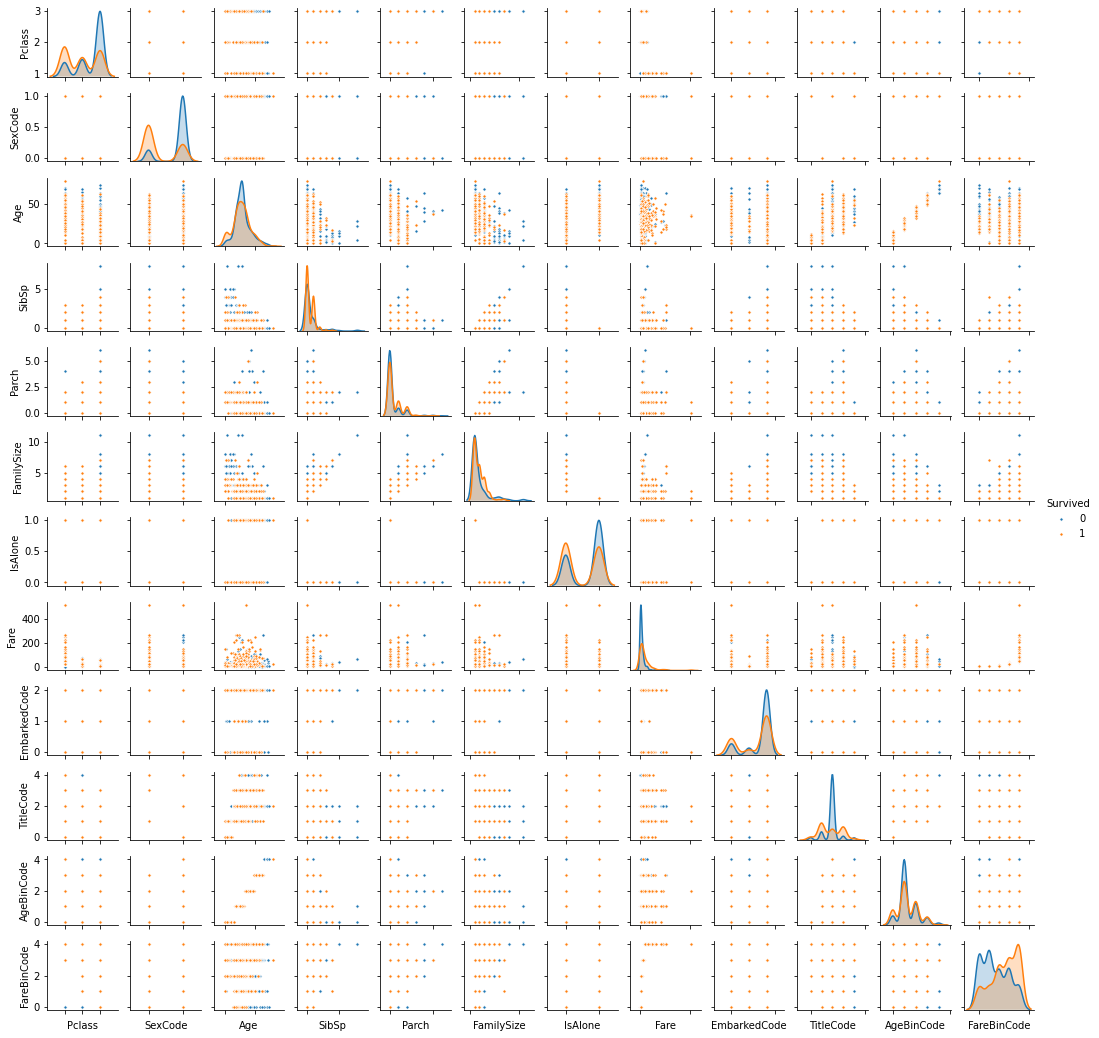

In [87]:
columns = ['Survived', 'Pclass', 'SexCode', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'EmbarkedCode', 'TitleCode', 'AgeBinCode', 'FareBinCode']
plot = sns.pairplot(data=train_cleaned.loc[:, columns], hue='Survived', height=1.2, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
plot.set(xticklabels=[])

Text(0.5, 1.05, 'Pearson Correlation of Features')

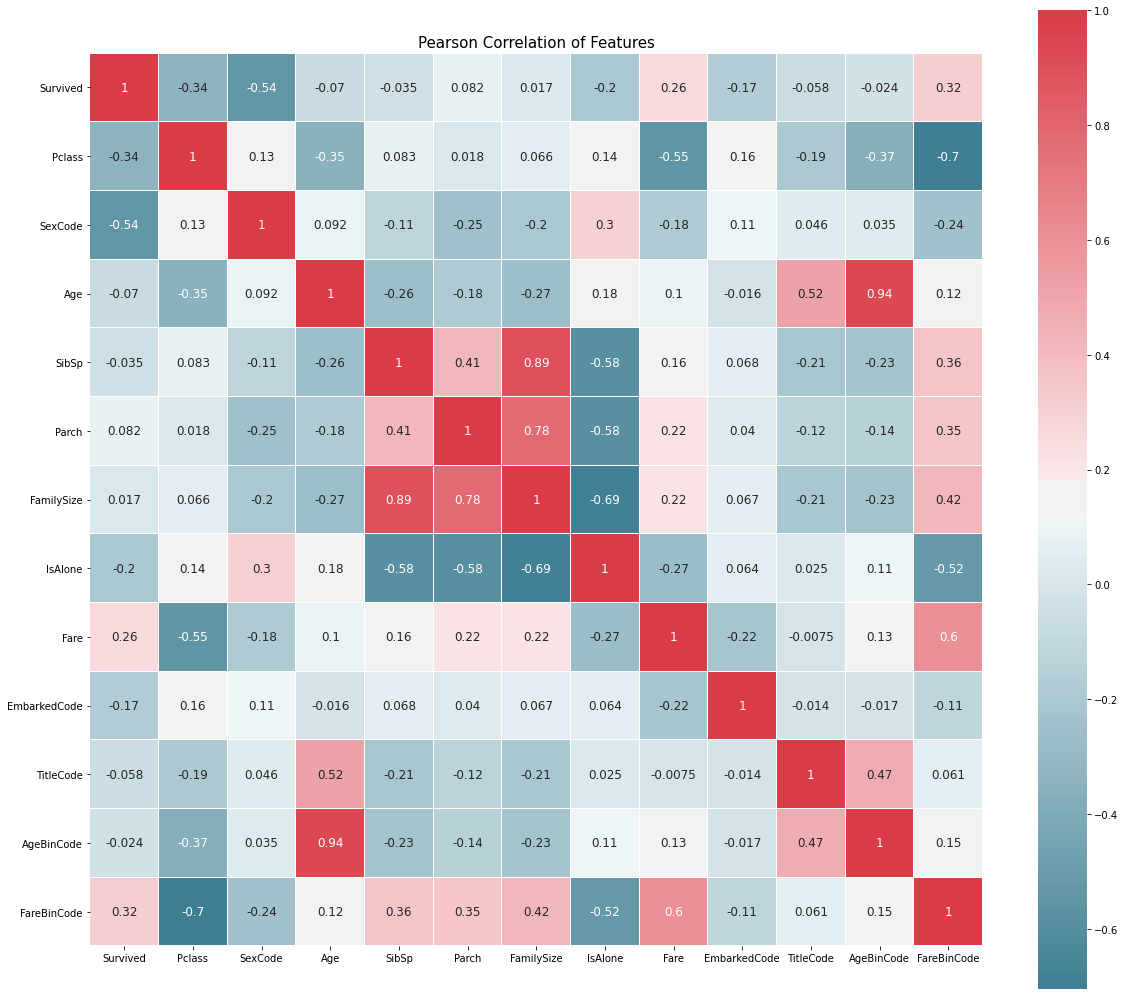

In [88]:
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

columns = ['Survived', 'Pclass', 'SexCode', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'EmbarkedCode', 'TitleCode', 'AgeBinCode', 'FareBinCode']

sns.heatmap(
    train_cleaned.loc[:, columns].corr(), 
    cmap=colormap,
    square=True,
    cbar_kws={'shrink': .9},
    ax=ax,
    annot=True,
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

# 5. Model Data <a id="5"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 5.1. Extract Features and Labels for Modeling<a id="5.1"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [89]:
features = ['Pclass', 'SexCode', 'AgeBinCode', 'SibSp', 'Parch', 'FareBinCode', 'CabinClassCode', 'EmbarkedCode', 'TitleCode', 'FamilySize', 'IsAlone']
labels = ['Survived']
train_features = train_cleaned.loc[:, features]
train_labels = train_cleaned.loc[:, labels]

In [90]:
train_features

Pclass  SexCode  AgeBinCode  SibSp  Parch  FareBinCode  CabinClassCode  \
0         3        1           1      1      0            0               5   
1         1        0           2      1      0            4               2   
2         3        0           1      0      0            1               5   
3         1        0           2      1      0            4               2   
4         3        1           2      0      0            1               5   
..      ...      ...         ...    ...    ...          ...             ...   
886       2        1           1      0      0            2               5   
887       1        0           1      0      0            3               1   
888       3        0           1      1      2            3               5   
889       1        1           1      0      0            3               2   
890       3        1           1      0      0            0               5   

     EmbarkedCode  TitleCode  FamilySize  IsAlone  
0               2          2           2        0  
1               0          3           2        0  
2               2          1           1        1  
3               2          3           2        0  
4               2          2           1        1  
..            ...        ...         ...      ...  
886             2          4           1        1  
887             2          1           1        1  
888             2          1           4        0  
889             0          2           1        1  
890             1          2           1        1  

[891 rows x 11 columns]

In [91]:
test_features = test_cleaned.loc[:, features]
test_features

Pclass  SexCode  AgeBinCode  SibSp  Parch  FareBinCode  CabinClassCode  \
891        3        1           2      0      0            0               5   
892        3        0           2      1      0            0               5   
893        2        1           3      0      0            1               5   
894        3        1           1      0      0            1               5   
895        3        0           1      1      1            2               5   
896        3        1           0      0      0            1               5   
897        3        0           1      0      0            0               5   
898        2        1           1      1      1            3               5   
899        3        0           1      0      0            0               5   
900        3        1           1      2      0            3               5   
901        3        1           1      0      0            1               5   
902        1        1           2      0      0            3               2   
903        1        0           1      1      0            4               1   
904        2        1           3      1      0            3               5   
905        1        0           2      1      0            4               4   
906        2        0           1      1      0            3               5   
907        2        1           2      0      0            2               5   
908        3        1           1      0      0            0               5   
909        3        0           1      1      0            1               5   
910        3        0           2      0      0            0               5   
911        1        1           3      1      0            4               2   
912        3        1           0      0      1            0               5   
913        1        0           2      0      0            3               2   
914        1        1           1      0      1            4               2   
915        1        0           2      1      3            4               1   
916        3        1           3      1      0            2               5   
917        1        0           1      0      1            4               1   
918        3        1           1      0      0            0               5   
919        1        1           2      0      0            3               0   
920        3        1           1      2      0            3               5   
921        2        1           3      1      0            3               5   
922        2        1           1      2      0            3               5   
923        3        0           2      1      2            2               5   
924        3        0           2      1      2            3               5   
925        1        1           1      1      0            4               2   
926        3        1           1      0      0            0               5   
927        3        0           1      0      0            1               5   
928        3        0           1      0      0            1               5   
929        3        1           1      0      0            1               5   
930        3        1           1      0      0            4               5   
931        3        1           2      0      1            2               5   
932        1        1           1      0      0            3               3   
933        3        1           2      0      0            0               5   
934        2        0           1      0      0            2               5   
935        1        0           2      1      0            4               3   
936        3        1           1      0      0            1               5   
937        1        1           2      0      0            3               0   
938        3        1           1      0      0            0               5   
939        1        0           3      0      0            4               3   
940   

## 5.2. Machine Learning Modeling<a id="5.2"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [92]:
classifiers = [
    ### Ensemble Model
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    ### Gaussian Model
    gaussian_process.GaussianProcessClassifier(),
    
    ### Linear Model
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    ### Naive Bayes Model
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    ### SVM Model
    svm.SVC(),
    svm.NuSVC(),
    svm.LinearSVC(),
    
    ### Tree Model
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ### Discriminant Analysis Model
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis()
]

In [93]:
classifier_dataset = pd.DataFrame(
    columns=['Name', 'Parameter', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy 3*STD', 'Time']
)
prediction_dataset = train_labels.copy()

In [94]:
classifier_dataset

Empty DataFrame
Columns: [Name, Parameter, Train Accuracy Mean, Test Accuracy Mean, Test Accuracy 3*STD, Time]
Index: []

In [95]:
prediction_dataset

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [96]:
cv_split = ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=2020)

In [97]:
for idx, classifier in enumerate(classifiers):
    name = classifier.__class__.__name__
    
    print('Model {:30s} Selected'.format(name))
    
    classifier_dataset.loc[idx, 'Name'] = name
    classifier_dataset.loc[idx, 'Parameter'] = str(classifier.get_params())
    
    cv_results = cross_validate(
        classifier, 
        train_features, train_labels['Survived'].to_list(), 
        cv=cv_split, 
        return_train_score=True
    )
    
    classifier_dataset.loc[idx, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    classifier_dataset.loc[idx, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    classifier_dataset.loc[idx, 'Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3
    classifier_dataset.loc[idx, 'Time'] = cv_results['fit_time'].mean()
    
    classifier.fit(train_features, train_labels['Survived'].to_list())
    prediction_dataset[name] = classifier.predict(train_features)

Model AdaBoostClassifier             Selected
Model BaggingClassifier              Selected
Model ExtraTreesClassifier           Selected
Model GradientBoostingClassifier     Selected
Model RandomForestClassifier         Selected
Model GaussianProcessClassifier      Selected
Model LogisticRegressionCV           Selected
Model PassiveAggressiveClassifier    Selected
Model RidgeClassifierCV              Selected
Model SGDClassifier                  Selected
Model Perceptron                     Selected
Model BernoulliNB                    Selected
Model GaussianNB                     Selected
Model SVC                            Selected
Model NuSVC                          Selected
Model LinearSVC                      Selected


/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

Model DecisionTreeClassifier         Selected
Model ExtraTreeClassifier            Selected
Model LinearDiscriminantAnalysis     Selected
Model QuadraticDiscriminantAnalysis  Selected


/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnin

In [98]:
classifier_dataset.sort_values(by=['Test Accuracy Mean'], ascending = False, inplace = True)
classifier_dataset

Name  \
13                            SVC   
14                          NuSVC   
3      GradientBoostingClassifier   
0              AdaBoostClassifier   
4          RandomForestClassifier   
1               BaggingClassifier   
2            ExtraTreesClassifier   
15                      LinearSVC   
8               RidgeClassifierCV   
18     LinearDiscriminantAnalysis   
5       GaussianProcessClassifier   
17            ExtraTreeClassifier   
6            LogisticRegressionCV   
16         DecisionTreeClassifier   
12                     GaussianNB   
19  QuadraticDiscriminantAnalysis   
11                    BernoulliNB   
9                   SGDClassifier   
7     PassiveAggressiveClassifier   
10                     Perceptron   

                                            Parameter Train Accuracy Mean  \
13  {'C': 1.0, 'break_ties': False, 'cache_size': ...            0.834082   
14  {'break_ties': False, 'cache_size': 200, 'clas...             0.83427   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...            0.878652   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...            0.833333   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...            0.917603   
1   {'base_estimator': None, 'bootstrap': True, 'b...            0.910487   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...            0.917603   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...            0.798127   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...            0.797566   
18  {'n_components': None, 'priors': None, 'shrink...            0.797004   
5   {'copy_X_train': True, 'kernel': None, 'max_it...            0.894382   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...            0.917603   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...            0.796816   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...            0.917603   
12           {'priors': None, 'var_smoothing': 1e-09}            0.778652   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...            0.774532   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...            0.764419   
9   {'alpha': 0.0001, 'average': False, 'class_wei...             0.76161   
7   {'C': 1.0, 'average': False, 'class_weight': N...            0.731461   
10  {'alpha': 0.0001, 'class_weight': None, 'early...            0.724719   

   Test Accuracy Mean Test Accuracy 3*STD        Time  
13           0.827239           0.0562047   0.0072114  
14           0.826493           0.0528021  0.00865242  
3            0.816418           0.0612713   0.0675078  
0            0.808582           0.0686496   0.0714669  
4             0.80709           0.0878642    0.134748  
1            0.803358           0.0984884   0.0177374  
2            0.797761           0.0826844    0.108187  
15           0.795522           0.0714667   0.0204584  
8             0.79403           0.0737108  0.00296059  
18           0.793657           0.0767506  0.00281098  
5            0.789925           0.0617298   0.0826041  
17           0.789552            0.114398  0.00205557  
6            0.788806           0.0967102    0.262906  
16            0.78806           0.0921453  0.00234921  
12           0.766045           0.0929913  0.00213876  
19           0.751493            0.104555  0.00319939  
11           0.750746             0.10816    0.001897  
9            0.745149            0.144403  0.00329182  
7            0.728358            0.295607  0.00208724  
10           0.725373            0.287283   0.0023488

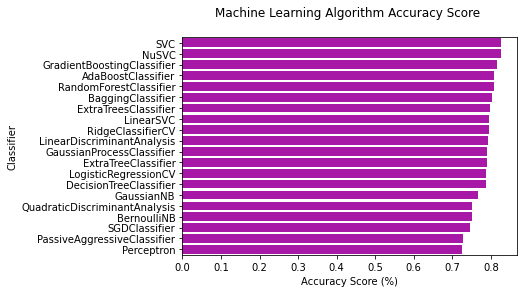

In [99]:
sns.barplot(x='Test Accuracy Mean', y='Name', data=classifier_dataset, color='m')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Classifier')
plt.show()

In [100]:
prediction_dataset

Survived  AdaBoostClassifier  BaggingClassifier  ExtraTreesClassifier  \
0           0                   0                  0                     0   
1           1                   1                  1                     1   
2           1                   1                  0                     0   
3           1                   1                  1                     1   
4           0                   0                  0                     0   
..        ...                 ...                ...                   ...   
886         0                   0                  0                     0   
887         1                   1                  1                     1   
888         0                   1                  0                     0   
889         1                   0                  0                     0   
890         0                   0                  0                     0   

     GradientBoostingClassifier  RandomForestClassifier  \
0                             0                       0   
1                             1                       1   
2                             0                       0   
3                             1                       1   
4                             0                       0   
..                          ...                     ...   
886                           0                       0   
887                           1                       1   
888                           0                       0   
889                           0                       0   
890                           0                       0   

     GaussianProcessClassifier  LogisticRegressionCV  \
0                            0                     0   
1                            1                     1   
2                            0                     1   
3                            1                     1   
4                            0                     0   
..                         ...                   ...   
886                          0                     0   
887                          1                     1   
888                          0                     1   
889                          0                     1   
890                          0                     0   

     PassiveAggressiveClassifier  RidgeClassifierCV  SGDClassifier  \
0                              1                  0              0   
1                              1                  1              1   
2                              1                  1              1   
3                              1                  1              1   
4                              1                  0              0   
..                           ...                ...            ...   
886                            1                  0              0   
887                            1                  1              1   
888                            1                  1              1   
889                            1                  0              1   
890                            1                  0              0   

     Perceptron  BernoulliNB  GaussianNB  SVC  NuSVC  LinearSVC  \
0             0            0           0    0      0          0   
1             1            1           1    1      1          1   
2             1            1           1    1      1          1   
3             1            1           1    1      1          1   
4             0            0           0    0      0          0   
..          ...          ...         ...  ...    ...        ...   
886           0            0           1    0      0          0   
887           1            1           1    1      1          1   
888           1            1           1    1      1          1   
889           0            0           1    0      0          0   
890           0            0           0    0      0          0   

     DecisionTreeClassifier  ExtraTreeCl

In [101]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype(np.float32) / cm.sum(axis=1)[:, np.newaxis]
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, 
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
    
    plt.tight_layout()
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')

[[492  57]
 [ 93 249]]
[[0.9  0.1 ]
 [0.27 0.73]]


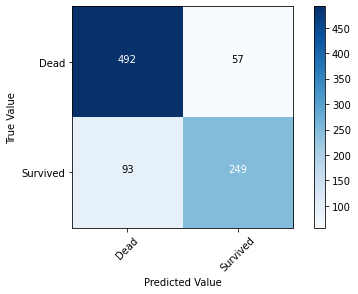

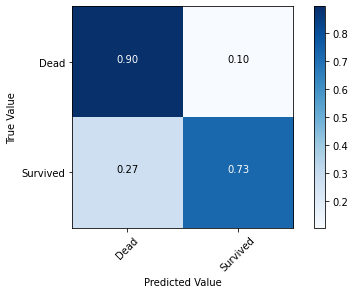

In [102]:
cnf_mat = confusion_matrix(prediction_dataset['Survived'].to_list(), prediction_dataset['SVC'].to_list())
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_mat, ['Dead', 'Survived'])

plt.figure()
plot_confusion_matrix(cnf_mat, ['Dead', 'Survived'], normalize=True)

## 5.3. Hyper Parameter Tuning<a id="5.3"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [103]:
dtree = tree.DecisionTreeClassifier(random_state=2020)
base_results = cross_validate(
    dtree, 
    train_features, train_labels['Survived'].to_list(), 
    cv=cv_split, 
    return_train_score=True
)
dtree.fit(train_features, train_labels['Survived'].to_list())

print('Before DT Parameter: {}'.format(dtree.get_params()))
print('Before DT Training Score: {:.2f}'.format(base_results['train_score'].mean()))
print('Before DT Test Score: {:.2f}'.format(base_results['test_score'].mean()))
print('Before DT Test Score 3*std: {:.2f}'.format(base_results['test_score'].std() * 3))

Before DT Parameter: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 2020, 'splitter': 'best'}
Before DT Training Score: 0.92
Before DT Test Score: 0.79
Before DT Test Score 3*std: 0.08


In [104]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'random_state': [2020]
}
tune_model = GridSearchCV(
    tree.DecisionTreeClassifier(), 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=cv_split, 
    return_train_score=True
)
tune_model.fit(train_features, train_labels['Survived'].to_list())

print('After DT Parameter: {}'.format(tune_model.best_params_))
print('After DT Training Score: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_].mean()))
print('After DT Test Score: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_].mean()))
print('After DT Test Score 3*std: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_].std() * 3))

After DT Parameter: {'criterion': 'gini', 'max_depth': 4, 'random_state': 2020}
After DT Training Score: 0.89
After DT Test Score: 0.86
After DT Test Score 3*std: 0.00


## 5.4. Feature Tuning<a id="5.4"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [105]:
print('BEFORE DT RFE Training Shape Old: ', train_features.shape) 
print('BEFORE DT RFE Training Columns Old: ', train_features.columns.values)

print("BEFORE DT RFE Training score mean: {:.2f}". format(base_results['train_score'].mean())) 
print("BEFORE DT RFE Test score mean: {:.2f}". format(base_results['test_score'].mean()))
print("BEFORE DT RFE Test score 3*std: +/- {:.2f}". format(base_results['test_score'].std() * 3))

BEFORE DT RFE Training Shape Old:  (891, 11)
BEFORE DT RFE Training Columns Old:  ['Pclass' 'SexCode' 'AgeBinCode' 'SibSp' 'Parch' 'FareBinCode'
 'CabinClassCode' 'EmbarkedCode' 'TitleCode' 'FamilySize' 'IsAlone']
BEFORE DT RFE Training score mean: 0.92
BEFORE DT RFE Test score mean: 0.79
BEFORE DT RFE Test score 3*std: +/- 0.08


In [106]:
dtree_rfe = RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(train_features, train_labels['Survived'].to_list())
train_features_rfe = train_features.columns.values[dtree_rfe.get_support()]
rfe_results = cross_validate(
    dtree, 
    train_features[train_features_rfe], train_labels['Survived'].to_list(), 
    cv=cv_split,
    return_train_score=True
)

print('AFTER DT RFE Training Shape New: ', train_features[train_features_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', train_features_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean())) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*3))

AFTER DT RFE Training Shape New:  (891, 3)
AFTER DT RFE Training Columns New:  ['Pclass' 'SexCode' 'FamilySize']
AFTER DT RFE Training w/bin score mean: 0.82
AFTER DT RFE Test w/bin score mean: 0.79
AFTER DT RFE Test w/bin score 3*std: +/- 0.06


In [107]:
rfe_tune_model = GridSearchCV(
    tree.DecisionTreeClassifier(), 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=cv_split, 
    return_train_score=True
)
rfe_tune_model.fit(train_features[train_features_rfe], train_labels['Survived'].to_list())

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_])) 
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 2020}
AFTER DT RFE Tuned Training w/bin score mean: 0.87
AFTER DT RFE Tuned Test w/bin score mean: 0.85
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 0.09


# 6. Validatea and Implement<a id="6"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

Text(0.5, 1.05, 'Pearson Correlation of Classifier')

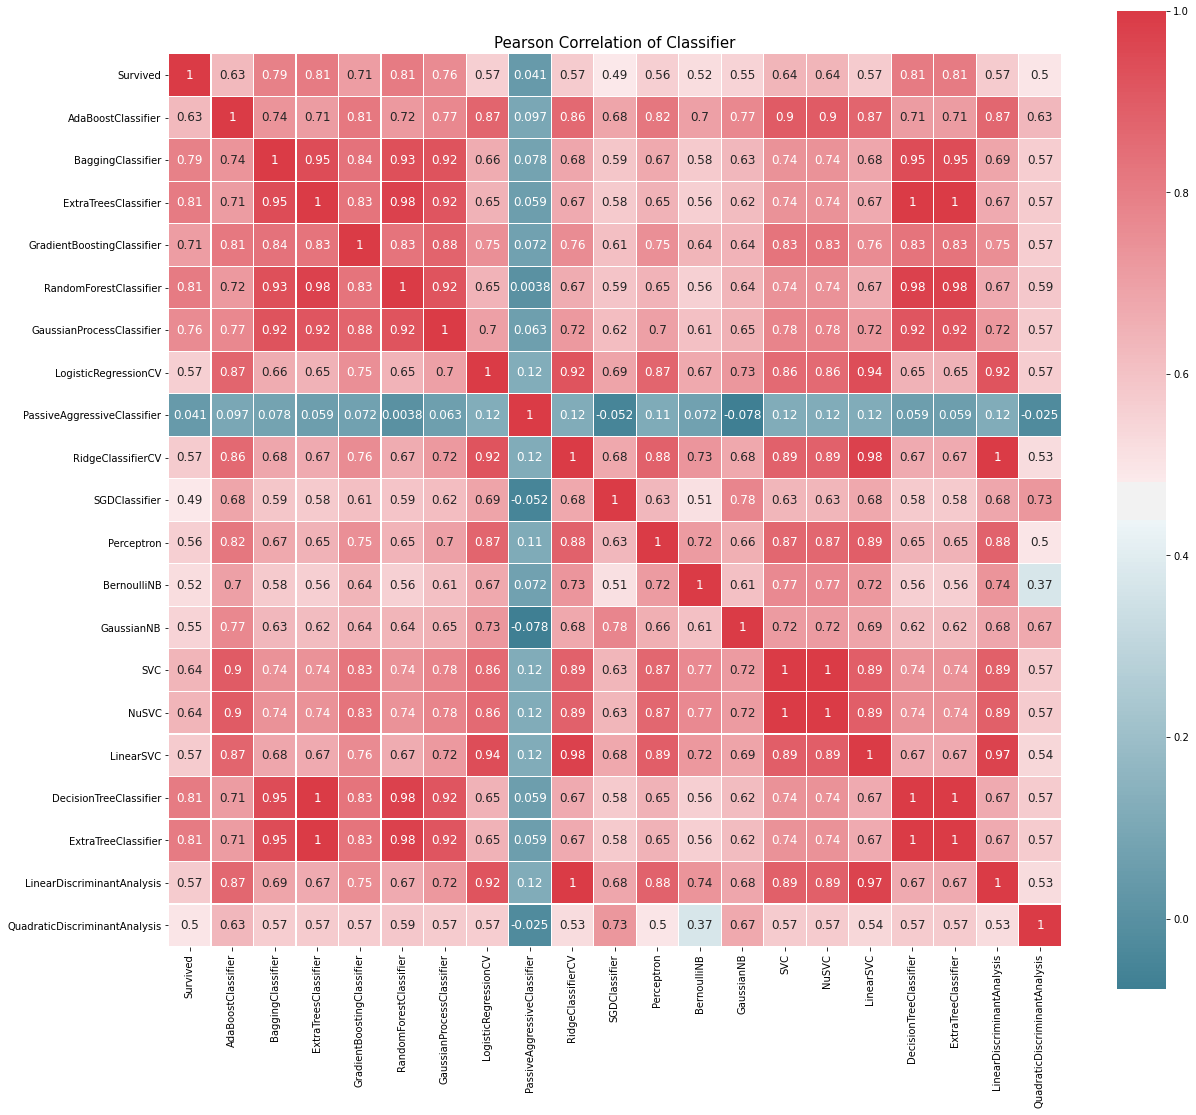

In [108]:
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

columns = prediction_dataset.columns

sns.heatmap(
    prediction_dataset.loc[:, columns].corr(), 
    cmap=colormap,
    square=True,
    cbar_kws={'shrink': .9},
    ax=ax,
    annot=True,
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)

plt.title('Pearson Correlation of Classifier', y=1.05, size=15)

## 6.1. Ensemble<a id="6.1"></a>
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [111]:
vote_estimators = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    ('lr', linear_model.LogisticRegressionCV()),
    
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    ('knn', neighbors.KNeighborsClassifier()),
    
    ('svc', svm.SVC(probability=True)),
]

In [112]:
vote_hard = ensemble.VotingClassifier(estimators=vote_estimators , voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, train_features, train_labels['Survived'].to_list(), cv=cv_split, return_train_score=True)
vote_hard.fit(train_features, train_labels['Survived'].to_list())

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean())) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*3))

Hard Voting Training w/bin score mean: 0.88
Hard Voting Test w/bin score mean: 0.82
Hard Voting Test w/bin score 3*std: +/- 0.05


In [114]:
vote_soft = ensemble.VotingClassifier(estimators=vote_estimators , voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, train_features, train_labels['Survived'].to_list(), cv=cv_split, return_train_score=True)
vote_soft.fit(train_features, train_labels['Survived'].to_list())

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean())) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*3))

Soft Voting Training w/bin score mean: 0.89
Soft Voting Test w/bin score mean: 0.82
Soft Voting Test w/bin score 3*std: +/- 0.06


In [120]:
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
    [{
        #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
        'n_estimators': grid_n_estimator, #default=50
        'learning_rate': grid_learn, #default=1
        #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
        'random_state': grid_seed
    }],
    [{
        #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
        'n_estimators': grid_n_estimator, #default=10
        'max_samples': grid_ratio, #default=1.0
        'random_state': grid_seed
     }],

    [{
        #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'random_state': grid_seed
     }],
    [{
        #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
        #'loss': ['deviance', 'exponential'], #default=’deviance’
        'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
        'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
        #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
        'max_depth': grid_max_depth, #default=3   
        'random_state': grid_seed
     }],
    [{
        #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
        'random_state': grid_seed
     }],
    [{    
        #GaussianProcessClassifier
        'max_iter_predict': grid_n_estimator, #default: 100
        'random_state': grid_seed
    }],
    [{
        #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
        'fit_intercept': grid_bool, #default: True
        #'penalty': ['l1','l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
        'random_state': grid_seed
     }],
    [{
        #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
        'alpha': grid_ratio, #default: 1.0
     }],
        #GaussianNB - 
    [{}],
    [{
        #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
        'n_neighbors': [1,2,3,4,5,6,7], #default: 5
        'weights': ['uniform', 'distance'], #default = ‘uniform’
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }],
    [{
        #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
        #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
        #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1,2,3,4,5], #default=1.0
        'gamma': grid_ratio, #edfault: auto
        'decision_function_shape': ['ovo', 'ovr'], #default:ovr
        'probability': [True],
        'random_state': grid_seed
     }],
]

start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_estimators, grid_param): #https://docs.python.org/3/library/functions.html#zip
    
    start = time.perf_counter()        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(train_features, train_labels['Survived'].to_list())
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

The best parameter for AdaBoostClassifier is {'learning_rate': 0.03, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.52 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 35.36 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with a runtime of 61.49 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 41.26 seconds.


/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divi

The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 91.14 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 3.60 seconds.


/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'saga'} with a runtime of 20.75 seconds.
The best parameter for BernoulliNB is {'alpha': 0.5} with a runtime of 0.18 seconds.
The best parameter for GaussianNB is {} with a runtime of 0.04 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 2.72 seconds.
The best parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 16.91 seconds.
Total optimization time was 5.13 minutes.


In [121]:
grid_hard = ensemble.VotingClassifier(estimators = vote_estimators , voting = 'hard')
grid_hard_cv = cross_validate(grid_hard, train_features, train_labels['Survived'].to_list(), cv  = cv_split, return_train_score=True)
grid_hard.fit(train_features, train_labels['Survived'].to_list())

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean())) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*3))

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 0.86
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 0.83
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 0.05


In [123]:
grid_soft = ensemble.VotingClassifier(estimators = vote_estimators , voting = 'soft')
grid_soft_cv = cross_validate(grid_soft, train_features, train_labels['Survived'].to_list(), cv  = cv_split, return_train_score=True)
grid_soft.fit(train_features, train_labels['Survived'].to_list())

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 85.32
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.01
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.60


In [127]:
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission['PassengerId'] = test_cleaned['PassengerId']
submission['Survived'] = grid_hard.predict(test_features)
submission

PassengerId  Survived
891           892         0
892           893         1
893           894         0
894           895         0
895           896         1
896           897         0
897           898         1
898           899         0
899           900         1
900           901         0
901           902         0
902           903         0
903           904         1
904           905         0
905           906         1
906           907         1
907           908         0
908           909         0
909           910         1
910           911         1
911           912         0
912           913         1
913           914         1
914           915         0
915           916         1
916           917         0
917           918         1
918           919         0
919           920         0
920           921         0
921           922         0
922           923         0
923           924         1
924           925         1
925           926         0
926           927         0
927           928         1
928           929         1
929           930         0
930           931         0
931           932         0
932           933         0
933           934         0
934           935         1
935           936         1
936           937         0
937           938         0
938           939         0
939           940         1
940           941         1
941           942         0
942           943         0
943           944         1
944           945         1
945           946         0
946           947         0
947           948         0
948           949         0
949           950         0
950           951         1
951           952         0
952           953         0
953           954         0
954           955         1
955           956         1
956           957         1
957           958         1
958           959         0
959           960         0
960           961         1
961           962         1
962           963         0
963           964         1
964           965         0
965           966         1
966           967         0
967           968         0
968           969         1
969           970         0
970           971         1
971           972         1
972           973         0
973           974         0
974           975         0
975           976         0
976           977         0
977           978         1
978           979         1
979           980         1
980           981         1
981           982         1
982           983         0
983           984         1
984           985         0
985           986         0
986           987         0
987           988         1
988           989         0
989           990         1
990           991         0
991           992         1
992           993         0
993           994         0
994           995         0
995           996         1
996           997         0
997           998         0
998           999         0
999          1000         0
1000         1001         0
1001         1002         0
1002         1003         1
1003         1004         1
1004         1005         1
1005         1006         1
1006         1007         0
1007         1008         0
1008         1009         1
1009         1010         0
1010         1011         1
1011         1012         1
1012         1013         0
1013         1014         1
1014         1015         0
1015         1016         0
1016         1017         1
1017         1018         0
1018         1019         1
1019         1020         0
1020         1021         0
1021         1022         0
1022         1023         0
1023         1024         0
1024         1025         0
1025         1026         0
1026         1027         0
1027         1028         0
1028         1029         0
1029         1030         1
1030         1031         0
1031         1032         0
1032         1033         1
10

In [128]:
submission.to_csv('./data/submission/submission_v2.csv', index=False)